In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Cargar el archivo Excel
data = pd.read_excel(next(iter(uploaded)))

# Convertir todas las columnas a valores numéricos
data = data.apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas del dataset
data.head()

Saving r-13.xlsx to r-13.xlsx


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13
0,13.5,16.5,122.3,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.3,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.3,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [ ]:
# Renombrar las columnas
data.columns = ['faminc', 'cigtax', 'cigprice', 'bwght', 'fatheduc', 'motheduc', 'parity', 'male','white', 'cigs', 'lbwght', 'bwghtlbs', 'packs', 'lfaminc']

# Mostrar las primeras filas con las nuevas columnas
data.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.3,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.3,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.3,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.3,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.3,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186



Se insertó una fila extra directamente en la base de datos para el siguiente cambio:

In [ ]:
import numpy as np
# Identificar columnas con valores NaN y mostrar la cantidad de valores faltantes
nan_columns = data.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print("\nColumnas con valores NaN y cantidad de datos faltantes en cada una:")
print(nan_columns)



Columnas con valores NaN y cantidad de datos faltantes en cada una:
fatheduc    196
motheduc      1
dtype: int64


In [ ]:
from scipy.stats import kstest
from google.colab import files
# Seleccionar las columnas que deseas analizar
columns_to_test = ['fatheduc', 'motheduc']  # Reemplaza con los nombres de tus columnas

# Realizar la prueba de Kolmogorov-Smirnov
for col in columns_to_test:
    col_data = data[col].dropna()  # Eliminar valores NaN para la prueba

    # Prueba de Kolmogorov-Smirnov con comparación de distribución normal
    ks_stat, ks_p = kstest(col_data, 'norm', args=(col_data.mean(), col_data.std()))
    print(f"\nPrueba de Kolmogorov-Smirnov para {col}:")
    print(f"Estadístico: {ks_stat}, Valor p: {ks_p}")

    # Interpretación
    if ks_p > 0.05:
        print(f"{col} sigue una distribución normal según Kolmogorov-Smirnov (p > 0.05).")
    else:
        print(f"{col} no sigue una distribución normal según Kolmogorov-Smirnov (p <= 0.05).")


Prueba de Kolmogorov-Smirnov para fatheduc:
Estadístico: 0.19481071122065258, Valor p: 4.16943809587777e-40
fatheduc no sigue una distribución normal según Kolmogorov-Smirnov (p <= 0.05).

Prueba de Kolmogorov-Smirnov para motheduc:
Estadístico: 0.21836529588514764, Valor p: 1.4990985633823139e-58
motheduc no sigue una distribución normal según Kolmogorov-Smirnov (p <= 0.05).


Como no se sigue normalidad según la prueba anterior, se procede a reemplazar con la mediana ya que es más robusta que la media

In [ ]:
# Reemplazar valores NaN con la mediana de cada columna (Ya que no se sigue normalidad, por lo que mediana es más robusta que la media)
data = data.fillna(data.median())

# Identificar columnas con valores NaN y mostrar la cantidad de valores faltantes(Para corroborar)
nan_columns = data.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print("\nColumnas con valores NaN y cantidad de datos faltantes en cada una:")
print(nan_columns)


Columnas con valores NaN y cantidad de datos faltantes en cada una:
Series([], dtype: int64)


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar las estadísticas descriptivas de los datos
data.describe()


,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.018732,12.935159,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244484,20.353964,2.577915,2.376004,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918064
min,0.500000,2.000000,103.800000,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800000,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800000,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,15.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


En la anterior tabla se puede observar la fila "count" que representa la cantidad de registros de cada variable observada, la media o promedio representada por "mean" de cada variable, la desviación estandar "std", el mínimo "min" (menor valor encontrado de esa variable), el "25%" representa el primer cuartil de cada variable, el "50%" es el segundo cuartil que contempla a la mitad de los datos centrales dentro de esta variable, el "75%" representa al tercer cuartil de cada variable y la fila "max" es el maximo (mayor valor encontrado dentro de la columna de la tabla de cada variable).

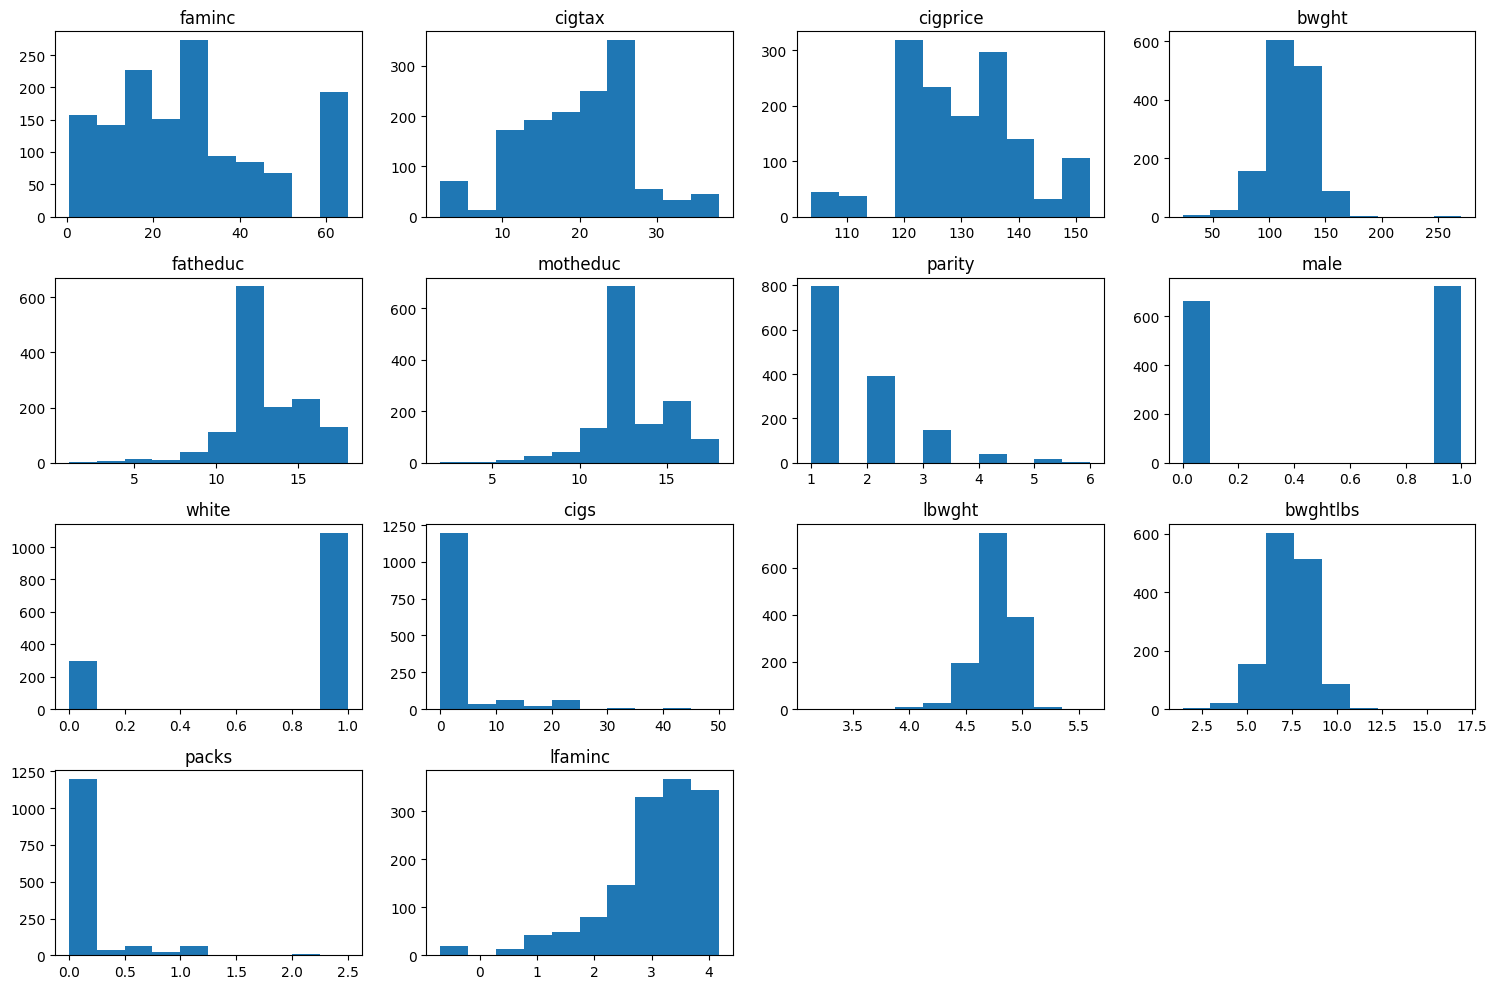

In [ ]:
# Crear histogramas para cada variable
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

Los gráficos observados anteriormente son histogramas de cada variable:

**faminc**

En el gráfico se muestra un histograma que representa la distribución del Ingreso Familiar durante un período determinado (1988), existen 4 intervalos que están divididos en 20 unidades de miles de dolares (0-20, 20-40, 40-60, 60-80). El Ingreso Familiar varía entre 0.5 y 65.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de ingreso familiar está dentro de un rango, se ve que la frecuencia mayor se produce en el rango entre el 20 a 40 con una cantidad mayor a 250 observaciones, y la menor frecuencia se encuentra entre 30 a 40 con 0 observaciones en un cierto punto de ese rango.

**cigtax**

En el gráfico se muestra un histograma que representa la distribución del Impuesto sobre los cigarrillos durante un período determinado (1988), existen 4 intervalos que están divididos en 10 unidades de dolares (0-10, 10-20, 20-30, 30-40). El Impuesto sobre cigarrillos varía entre 2.0 y 38.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de impuesto sobre cigarrillos está dentro de un rango, se ve que la frecuencia mayor se produce entre el 20 a 30 con una cantidad mayor a 300 observaciones, y la menor frecuencia se encuentra entre 0 a 10 con menos de 100 observaciones.

**cigprice**

En el gráfico se muestra un histograma que representa la distribución del Precio de cigarrillos durante un período determinado (1988), existen 6 intervalos que están divididos en 10 unidades de dolares (100-110, 110-120, 120-130, 130-140, 140-150, 150-160). El precio de cigarrillos varía entre 103.8 y 152.5, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de precio de cigarrillos está dentro de un rango, se ve que la frecuencia mayor se produce entre 120 a 130 con una cantidad mayor a 300 observaciones, y la menor frecuencia se encuentra entre 110 a 120 con menos de 50 observaciones.

**bwght**

En el gráfico se muestra un histograma que representa la distribución del peso del recien nacido durante un período determinado , existen 6 intervalos que están divididos en 50 unidades medido en onzas (0-50, 50-100, 100-150, 150-200, 200-250, 250-300). El peso varía entre 23.0 y 271.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de peso está dentro de un rango, se ve que la frecuencia mayor se produce entre 100 a 150 con una cantidad de casi 600 observaciones, y la menor frecuencia se encuentra entre 200 a 250 con casi 0 observaciones. Y se observa un tendencia entre el rango de 100 a 150 onzas en el de peso de un recien nacido.

**fatheduc**

En el gráfico se muestra un histograma que representa la distribución de los años de educación del padre durante un período determinado, existen 4 intervalos que están divididos en 5 unidades medido en años (0-5, 5-10, 10-15, 15-20). Los años varían entre 1.0 y 18.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que el valor de años está dentro de un rango, se ve que la frecuencia mayor se produce entre 10 a 15 con una cantidad mayor a 600 observaciones, y la menor frecuencia se encuentra entre 0 a 5 años con menos de 50 observaciones.


**motheduc**

En el gráfico se muestra un histograma que representa la distribución de los años de educación de la madre durante un período determinado, existen 4 intervalos que están divididos en 5 unidades medido en años (0-5, 5-10, 10-15, 15-20). Los años varían entre 2.0 y 18.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que el valor de años está dentro de un rango, se ve que la frecuencia mayor se produce entre 10 a 15 con una cantidad mayor a 600 observaciones (mas que el histograma de los años de educación del padre), y la menor frecuencia se encuentra entre 0 a 5 años con menos de 50 observaciones.

**parity**

En el gráfico se muestra un histograma que representa la distribución del orden del nacimiento del bebé durante un período determinado, existen 5 intervalos que están divididos en 1 unidades medido en escala de orden 1°,2°,3°,... (1-2, 2-3, 3-4, 4-5, 5-6). El orden varía entre 1.0 y 6.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de orden de nacimiento está dentro de un rango, se ve que la frecuencia mayor se produce entre 1 a 2 con una cantidad de casi 800 observaciones, y la menor frecuencia se encuentra entre 5 a 6 con menos de 50 observaciones. Se observa un comportamiento en la frecuencia de manera decayente, teniendo mayor frecuencia en primer orden de nacimiento y progresivamente disminuye hasta el sexto lugar de nacimiento.

**male**

En el gráfico se muestra un histograma que representa la distribución de la cantidad de bebés hombres durante un período determinado, existen 5 intervalos que están divididos en 0.2 unidades (0.0-0.2, 0.2-0.4, 0.4-0.6, 0.6-0.8, 0.8-1.0). El orden varía entre 0.0 y 1.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de numero de bebés hombre (=1) está dentro de un rango, se ve que la frecuencia mayor se produce entre 0.8 a 1.0 con una cantidad de casi 700 observaciones, y la menor frecuencia se encuentra entre 0.0 a 0.2 con un poco mas de 600 observaciones. Esto quiere decir que hay un mayor número de bebés hombres que mujeres, pero no con una diferencia tan grande.

**white**

En el gráfico se muestra un histograma que representa la distribución de la cantidad de madres blancas durante un período determinado, existen 5 intervalos que están divididos en 0.2 unidades (0.0-0.2, 0.2-0.4, 0.4-0.6, 0.6-0.8, 0.8-1.0). El orden varía entre 0.0 y 1.0, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de numero de mamás blancas (=1) está dentro de un rango, se ve que la frecuencia mayor se produce entre 0.8 a 1.0 con una cantidad mayor a las 1000 observaciones, y la menor frecuencia se encuentra entre 0.0 a 0.2 con casi 300 observaciones. Se observa una gran cantidad de madres blancas en comparación a madre no blanca.

**cigs**

En el gráfico se muestra un histograma que representa la distribución de la cantidad de cigarrillos que fumo por día la madre durante el embarazo, existen 5 intervalos que están divididos en 10 unidades de cigarrillo (0-10, 10-20, 20-30, 30-40, 40-50). La cantidad de cigarrillos varía entre 0 y 50, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de cigarrillos por día que están dentro de un rango, se ve que la frecuencia mayor se produce entre 0 a 10 con una cantidad mayor a las 1100 observaciones, y la menor frecuencia se encuentra entre 30 a 50 con menos de 100 observaciones.

**lbwght**

En el gráfico se muestra un histograma que representa la distribución del logaritmo del peso al nacer durante un período determinado, existen 5 intervalos que están divididos en 0.5 unidades (3.0-3.5, 3.5-4.0, 4.0-4.5, 4.5-5.0, 5.0-5.5). El logaritmo del peso varía entre 3.1 y 5.6, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor logaritmico de peso está dentro de un rango, se ve que la frecuencia mayor se produce entre 4.5 a 5.0 con una cantidad mayor a 700 observaciones, y la menor frecuencia se encuentra entre 3.0 a 3.5 con casi 0 observaciones.

**bwghtlbs**

En el gráfico se muestra un histograma que representa la distribución del peso al nacer durante un período determinado en libras, existen 7 intervalos que están divididos en 2.5 unidades en libras (0.0-2.5, 2.5-5.0,... 15.0-17.5). El peso varía entre 1.4 y 16.9, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de peso está dentro de un rango, se ve que la frecuencia mayor se produce entre 5.0 a 7.5 con una cantidad de casi 600 observaciones, y la menor frecuencia se encuentra entre 12.5 a 17.5 con casi 0 observaciones.

**packs**

En el gráfico se muestra un histograma que representa la distribución de la cantidad de paquetes fumados por día durante un período determinado, existen 5 intervalos que están divididos en 0.5 unidades en libras (0.0-0.5, 0.5-1.0, 1.0-1.5, 1.5-2.0, 2.0-2.5). La cantidad de paquetes varía entre 0.0 y 2.5, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor de paquetes está dentro de un rango, se ve que la frecuencia mayor se produce entre 0.0 a 0.5 con una cantidad de casi 1200 observaciones, y la menor frecuencia se encuentra entre 1.5 a 2.0 con casi 0 observaciones.

**lfaminc**

En el gráfico se muestra un histograma que representa la distribución del logaritmo del Ingreso Familiar durante un período determinado, existen 6 intervalos que están divididos en 1 unidad (-1.0-0.0, 0.0-1.0, 1.0-2.0, 2.0-3.0, 3.0-4.0, 4.0-5.0, 5.0-6.0). El logaritmo del Ingreso Familiar varía entre -0.6 y 4.1, en el gráfico se observa en el eje Y la frecuencia, es decir la cantidad de veces que un valor logaritmico de ingreso familiar está dentro de un rango, se ve que la frecuencia mayor se produce en el rango entre el 3 a 4 con una cantidad mayor a 300 observaciones, y la menor frecuencia se encuentra entre -1.0 a 0.0 con menos de 50 observaciones en un cierto punto de ese rango.

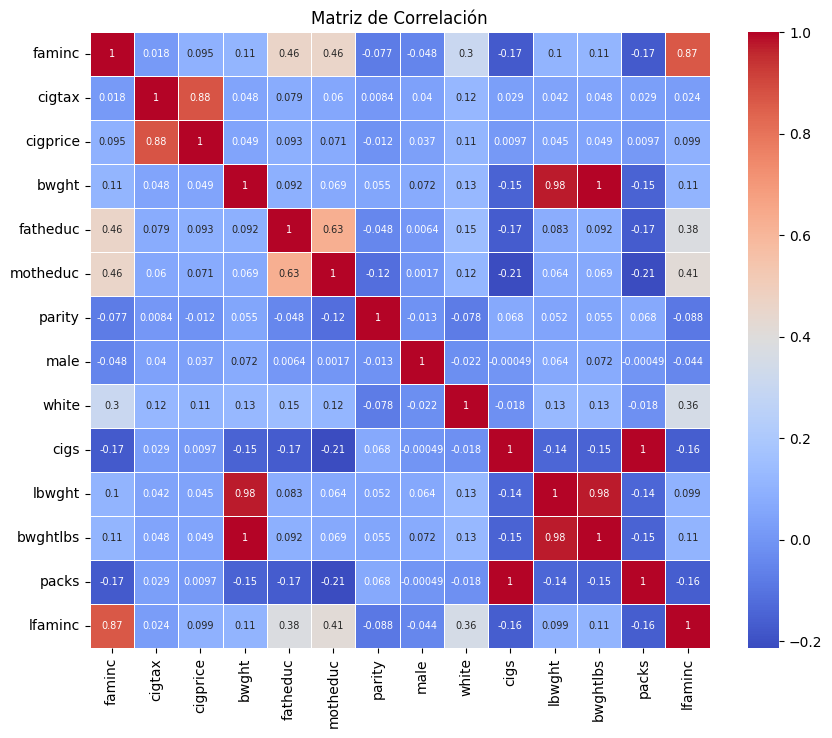

In [ ]:
# Matriz de correlación
corr_matrix = data.corr()

# Heatmap para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})
plt.title('Matriz de Correlación')
plt.show()

Las correlaciones puntuales y distintivas que se observaron en la anterior matriz de correlación se muestran a continuación:

*   Correlación positiva perfecta fuerte entre la cantidad de paquetes de cigarrillo fumados por día durante el embarazo y los números de cigarrillos que fumo la madre por día
*   Correlación positiva perfecta fuerte entre el peso del recien nacido en onzas con el peso al nacer en libras
*  Correlación positiva fuerte entre el logaritmo del peso al nacer y el peso del recien nacido en onzas
*  Correlación positiva fuerte entre el logaritmo del peso al nacer y el peso al nacer en libras
*  Correlación positiva fuerte entre el precio de los cigarrillos y los impuestos sobre los cigarrillos
*  Correlación positiva fuerte entre el logaritmo del ingreso familiar y el ingreso familiar
*  Correlación positiva moderada entre los años de educación del padre y los años de educación de la madre
*  Correlación positiva moderada entre los años de educación del padre y el ingreso familiar
*  Correlación positiva moderada entre los años de educación de la madre y el ingreso familiar
*  Correlación positiva moderada entre los años de educación de la madre y el logaritmo del ingreso familiar
*  Correlación positiva debil entre los años de educación del padre y el logaritmo del ingreso familiar




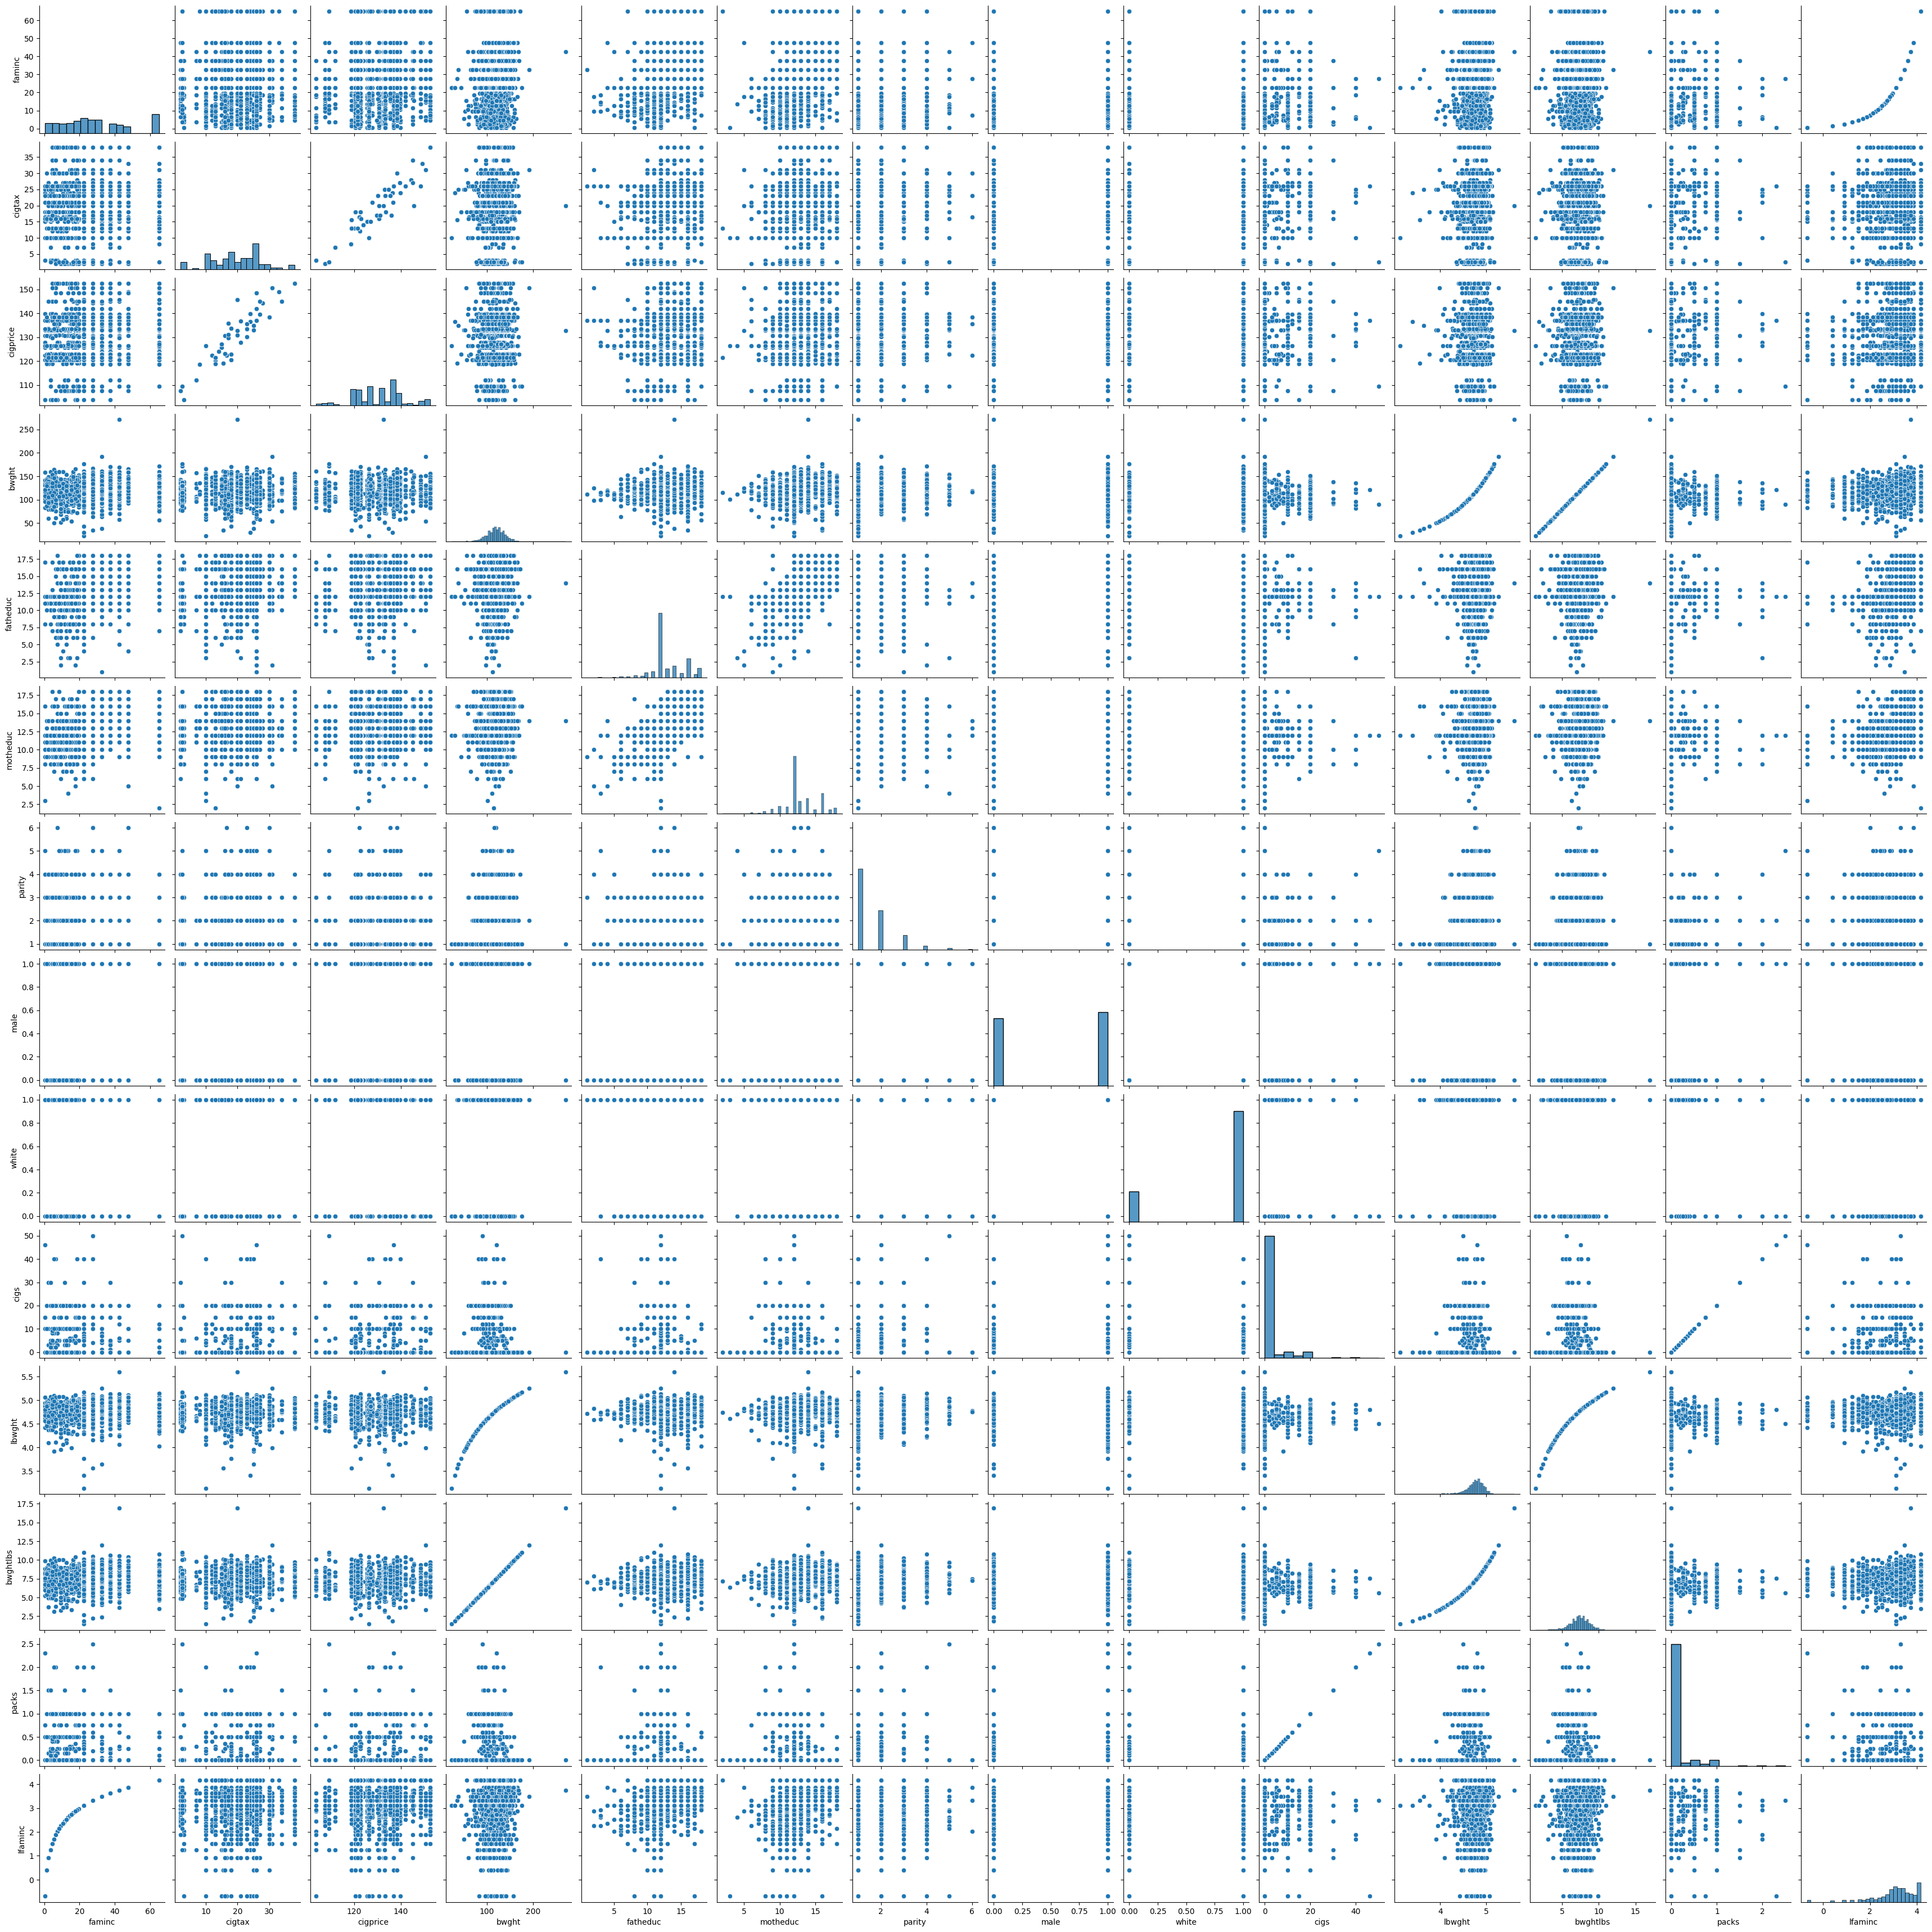

In [ ]:
# Pairplot para visualizar relaciones entre variables
sns.pairplot(data)
plt.show()

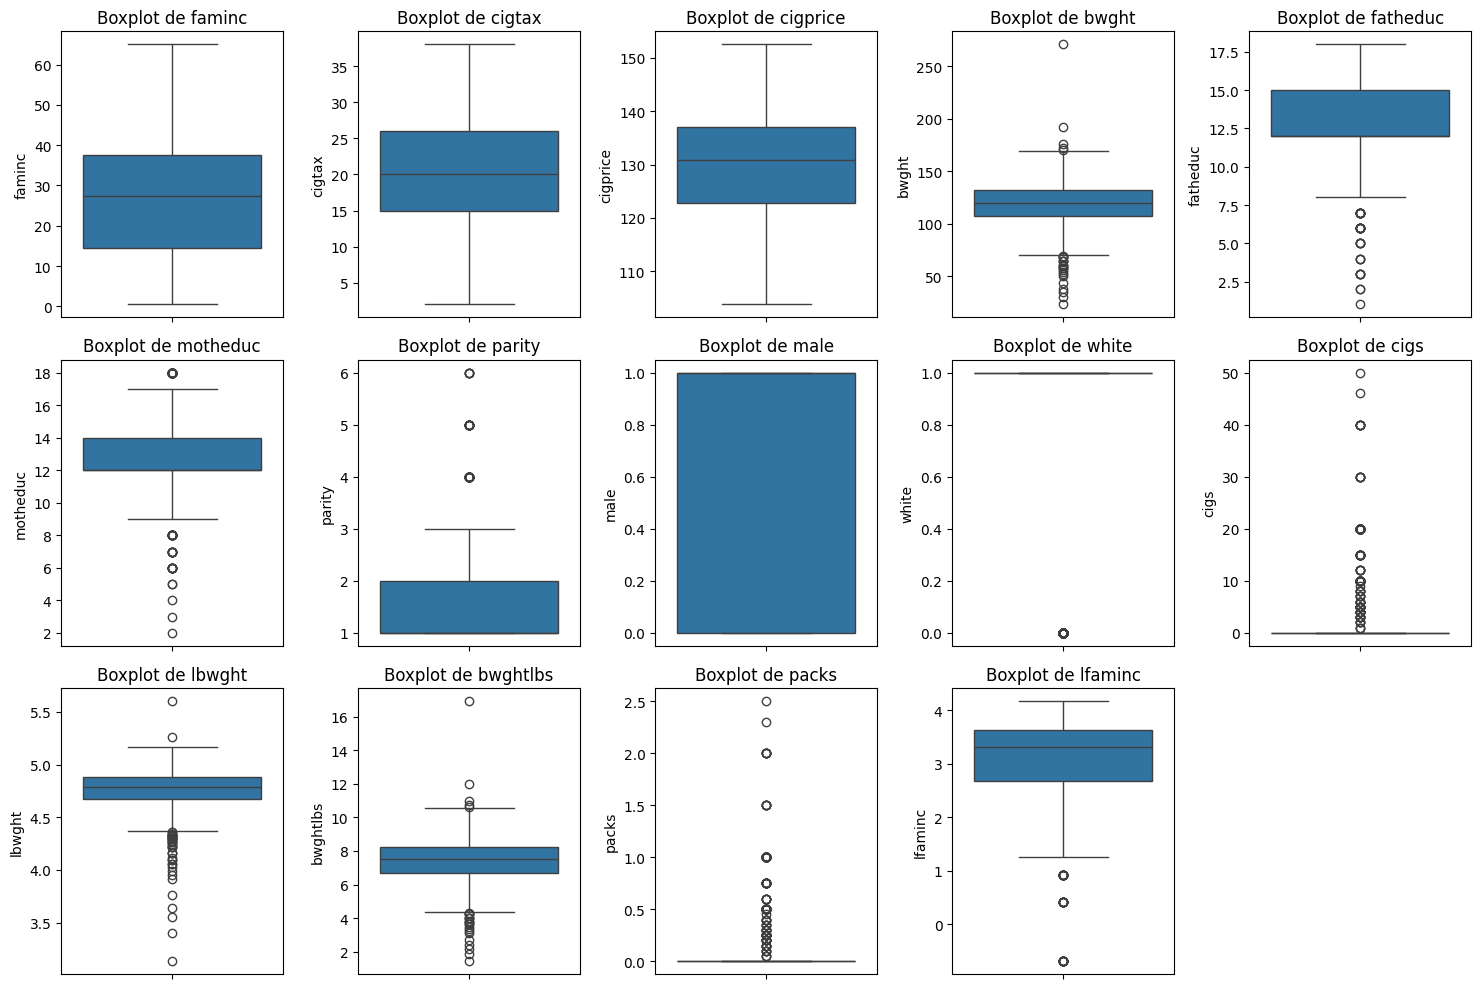

In [ ]:
# Crear boxplots para detectar outliers en las variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

Los diagramas de caja anteriormente observados se pueden interpretar de la siguiente manera:

Para el caso de los 3 primeros diagramas de caja del ingreso familiar, impuesto de los cigarrillos y el precio de los cigarrillos posee una distribución simetrica, ya que la mediana esta cerca del centro de la caja y sin valores atipicos, en cambio los diagramas del peso del recien nacido si posee muchos valores fuera del rango intercuartil, lo que indicaría valores mal tomados o casos especiales


In [ ]:
#3 Importar las librerías necesarias
import statsmodels.api as sm

# Definir las variables dependiente (y) e independientes (X)
X = data[['faminc', 'cigtax', 'cigprice', 'fatheduc', 'motheduc', 'parity', 'male','white', 'cigs', 'lbwght', 'bwghtlbs', 'packs', 'lfaminc']]  # Variables independientes
y = data['bwght']  # Variable dependiente (I+D)

# Agregar una constante al modelo (intercepto)
X = sm.add_constant(X)

# Estimar el modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

# Mostrar el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.589e+30
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:36:36   Log-Likelihood:                 39385.
No. Observations:                1388   AIC:                        -7.874e+04
Df Residuals:                    1375   BIC:                        -7.868e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.847e-13    2.8e-13      0.659      0.5

La significancia que vemos con el tabaquismo materno está bien documentada,Según el estudio de Higgins et al. (2016) en Journal of Epidemiology & Community Health encontró que las madres que fumaban durante el embarazo tenían un riesgo elevado de tener hijos con bajo peso al nacer. El bajo peso al nacer está asociado con un mayor riesgo de enfermedades crónicas, como diabetes y enfermedades cardiovasculares, en la adultez.


Otro estudio que avala todo esto es el de Chinchilla Araya y Durán Monge (2019) donde se revisan los efectos del tabaquismo materno durante el embarazo, destacando que la exposición al tabaco en el útero se asocia con un menor crecimiento fetal, una disminución en el peso al nacer y un incremento significativo de nacimientos con bajo peso.Estos hallazgos respaldan la importancia de reducir el tabaquismo materno para mejorar los resultados de salud en los recién nacidos.


$$
bwght = 1.847 \times 10^{-13} + 3.109 \times 10^{-15} \textit{faminc} + 3.830 \times 10^{-15} \textit{cigtax} + 2.026 \times 10^{-15} \textit{cigprice} - 1.682 \times 10^{-14} \textit{fatheduc} + 1.754 \times 10^{-14} \textit{motheduc} - 1.332 \times 10^{-15} \textit{parity} - 3.220 \times 10^{-15} \textit{male} - 2.665 \times 10^{-15} \textit{white} + 3.025 \times 10^{-15} \textit{cigs} - 1.137 \times 10^{-13} \textit{lbwght} + 1.600 \times 10^{+01} \textit{bwghtlbs} - 1.700 \times 10^{-16} \textit{packs} + 3.109 \times 10^{-15} \textit{lfaminc}
+ \textit{u}
$$



3) Los coeficientes del modelo de regresión revelan que algunas variables tienen un impacto significativo (p< 0.05) en el peso al nacer. El ingreso familiar, el impuesto sobre cigarrillos, el precio de los cigarrillos y la educación de la madre muestran coeficientes positivos, lo que indica que un aumento en estos factores conlleva a un incremento en el peso al nacer. Por otro lado, el fatheduc exhibe un coeficiente negativo inesperado en contraposición, lo cual podría resultar contradictorio y necesitar una revisión. La presencia de un coeficiente positivo para cigs (cantidad de cigarrillos fumados) es sorprendente y poco común, ya que suele asociarse con un impacto negativo. Esto podría indicar la presencia de problemas de colinealidad en el modelo. Asimismo, el peso en libras muestra una correlación perfecta con el peso en onzas, lo que resulta en un coeficiente extremadamente alto. Por otro lado, se observa que el consumo de tabaco tiene un efecto negativo en el peso al nacer, lo que respalda la idea de que fumar reduce el peso al nacer.

Los coeficientes de las variables parity, male, white, lbwgth y lfaminc no son significativos, lo que sugiere que no tienen un impacto significativo en el modelo. Para resumir, la presencia de multicolinealidad en un modelo puede comprometer la precisión de los coeficientes al provocar relaciones inesperadas y valores extremos. Esto indica que sería conveniente realizar ajustes adicionales en el modelo, como eliminar o combinar variables colineales, con el fin de fortalecer su robustez y claridad.


  .

In [ ]:
#4 R² ajustado
r2_ajustado = modelo.rsquared_adj

# AIC y BIC
aic = modelo.aic
bic = modelo.bic

# MSE (Error Cuadrático Medio)
mse = modelo.mse_resid

# Mostrar las métricas de ajuste del modelo
print(f"R² ajustado: {r2_ajustado}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"MSE: {mse}")


R² ajustado: 1.0
AIC: -78743.6089133512
BIC: -78675.54586451733
MSE: 1.3341665423242982e-26


4) Los resultados muestran un R² ajustado de 1.0 lo que significa que el modelo explica el 100% de la variabilidad en el peso al nacer.Esta perfección en los datos reales puede ser indicativo de sobreajuste. Los valores de AIC (-78743.61) y BIC (-78675.55) son muy bajos, lo que sugiere un ajuste muy bueno, pero también aumenta la posibilidad de sobreajuste. Un MSE cercano a cero (1.33e-26) indica que hay un mínimo error en las predicciones. Las métricas indican que el modelo es poco realista y es probable que haya capturado ruido o se haya ajustado de manera incorrecta a los datos. Se requiere una revisión adicional para confirmar si es apropiado.

In [ ]:
#5)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los valores de VIF
vif_data


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,8177.714339
1,faminc,4.367585
2,cigtax,4.468591
3,cigprice,4.452092
4,fatheduc,1.793535
5,motheduc,1.817216
6,parity,1.030583
7,male,1.012571
8,white,1.187621
9,cigs,inf


In [ ]:
# Definir las variables dependiente (y) e independientes (X)
X_new = data[['faminc', 'cigtax', 'cigprice', 'fatheduc', 'motheduc', 'parity', 'male','white', 'cigs', 'bwghtlbs', 'packs', ]]  # Variables independientes

# Agregar una constante al nuevo modelo (intercepto)
X_new = sm.add_constant(X_new)

# Estimar el nuevo modelo de regresión lineal múltiple
modelo_nuevo = sm.OLS(y, X_new).fit()

# Mostrar el resumen del nuevo modelo
print(modelo_nuevo.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.074e+30
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:24:04   Log-Likelihood:                 39345.
No. Observations:                1388   AIC:                        -7.867e+04
Df Residuals:                    1377   BIC:                        -7.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e-13   7.68e-14      2.777      0.0

5) El análisis del VIF muestra problemas de multicolinealidad en el modelo. La variable bwghtlbs tiene un VIF infinito porque está perfectamente correlacionada con bwght, ya que ambas representan el peso al nacer pero en distintas unidades. Además, los factores cigs y packs muestran un coeficiente de variación inflado (VIF) infinito, lo que sugiere una alta correlación al evaluar el consumo de tabaco materno. Además, las variables cigtax y cigprice tienen un valor de VIF de aproximadamente 4.5, lo que sugiere una moderada colinealidad. Estas colinealidades provocan distorsiones en los coeficientes, afectando su significancia estadística y causando un ajuste anormalmente alto (R² ajustado de 1.0), lo que sugiere que el modelo es inestable. Es aconsejable eliminar o combinar variables que estén altamente correlacionadas para mejorar la precisión de los resultados y facilitar la interpretación del modelo.

  .

In [ ]:
#6 R² ajustado del nuevo modelo
r2_ajustado_nuevo = modelo_nuevo.rsquared_adj

# AIC y BIC del nuevo modelo
aic_nuevo = modelo_nuevo.aic
bic_nuevo = modelo_nuevo.bic

# MSE del nuevo modelo
mse_nuevo = modelo_nuevo.mse_resid

# Mostrar las métricas del nuevo modelo
print(f"R² ajustado (nuevo modelo): {r2_ajustado_nuevo}")
print(f"AIC (nuevo modelo): {aic_nuevo}")
print(f"BIC (nuevo modelo): {bic_nuevo}")
print(f"MSE (nuevo modelo): {mse_nuevo}")

R² ajustado (nuevo modelo): 1.0
AIC (nuevo modelo): -78668.53509730747
BIC (nuevo modelo): -78610.94328675573
MSE (nuevo modelo): 1.4103288490797968e-26


In [ ]:
# Calcular el VIF para cada variable independiente en el nuevo modelo
vif_data_nuevo = pd.DataFrame()
vif_data_nuevo["Variable"] = X_new.columns
vif_data_nuevo["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Mostrar los valores de VIF del nuevo modelo
vif_data_nuevo

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,579.889902
1,faminc,1.518035
2,cigtax,4.457603
3,cigprice,4.440853
4,fatheduc,1.781190
5,motheduc,1.805412
6,parity,1.029979
7,male,1.011755
8,white,1.141544
9,cigs,inf


In [ ]:
# Crear un diccionario para almacenar las métricas de ambos modelos
comparacion_modelos = {
    "Métrica": ["R² ajustado", "AIC", "BIC", "MSE"],
    "Modelo Original": [r2_ajustado, aic, bic, mse],
    "Modelo Sin Variables Cuadráticas y Logarítmicas": [r2_ajustado_nuevo, aic_nuevo, bic_nuevo, mse_nuevo]
}

# Crear un DataFrame para la comparación
df_comparacion = pd.DataFrame(comparacion_modelos)

# Mostrar la tabla comparativa de las métricas
df_comparacion

,Métrica,Modelo Original,Modelo Sin Variables Cuadráticas y Logarítmicas
0,R² ajustado,1.000000e+00,1.000000e+00
1,AIC,-7.874361e+04,-7.866854e+04
2,BIC,-7.867555e+04,-7.861094e+04
3,MSE,1.334167e-26,1.410329e-26


In [ ]:
# Reestructurar los datos de VIF de manera adecuada para la comparación
vif_comparacion = pd.DataFrame({
    "Variable (Original)": vif_data["Variable"],
    "VIF (Original)": vif_data["VIF"],
    "Variable (Nuevo Modelo)": vif_data_nuevo["Variable"],
    "VIF (Nuevo Modelo)": vif_data_nuevo["VIF"]
})

# Mostrar la tabla comparativa de VIF
vif_comparacion

,Variable (Original),VIF (Original),Variable (Nuevo Modelo),VIF (Nuevo Modelo)
0,const,8177.714339,const,579.889902
1,faminc,4.367585,faminc,1.518035
2,cigtax,4.468591,cigtax,4.457603
3,cigprice,4.452092,cigprice,4.440853
4,fatheduc,1.793535,fatheduc,1.781190
5,motheduc,1.817216,motheduc,1.805412
6,parity,1.030583,parity,1.029979
7,male,1.012571,male,1.011755
8,white,1.187621,white,1.141544
9,cigs,inf,cigs,inf


6) El nuevo modelo, al eliminar variables logarítmicas y cuadráticas, sigue presentando un R² ajustado de 1.0, lo que indica un ajuste perfecto pero irreal, sugiriendo sobreajuste. Los valores de AIC y BIC son ligeramente superiores, reflejando una menor complejidad sin una pérdida significativa de ajuste. El MSE casi nulo (1.41e-26) indica un error de predicción prácticamente inexistente, reforzando la idea de sobreajuste. Aunque se observa una reducción en el VIF para algunas variables como `const`, la multicolinealidad persiste con `cigs` y `packs` (VIF infinito), señalando redundancia.

Eliminar las variables logarítmicas y cuadráticas simplifica ligeramente el modelo, pero no soluciona los problemas clave de multicolinealidad y sobreajuste. Esto afecta la interpretación y confiabilidad de los coeficientes, sugiriendo que es necesario un enfoque diferente para mejorar el modelo.

Bibliografia


1) Wooldridge, J. M. (2019). *Introductory Econometrics: A Modern Approach* (7.ª ed.). Cengage Learning.


2) Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). *Introduction to Linear Regression Analysis* (6.ª ed.). Wiley.


3) Kutner, M. H., Nachtsheim, C. J., Neter, J., & Li, W. (2004). *Applied Linear Statistical Models* (5.ª ed.). McGraw-Hill Education.


4) James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An Introduction to Statistical Learning: with Applications in R* (2.ª ed.). Springer.


5)  Seber, G. A. F., & Lee, A. J. (2012). *Linear Regression Analysis* (2.ª ed.). Wiley.
